# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0, 0.5, 'E (Newtons/Coulomb)')

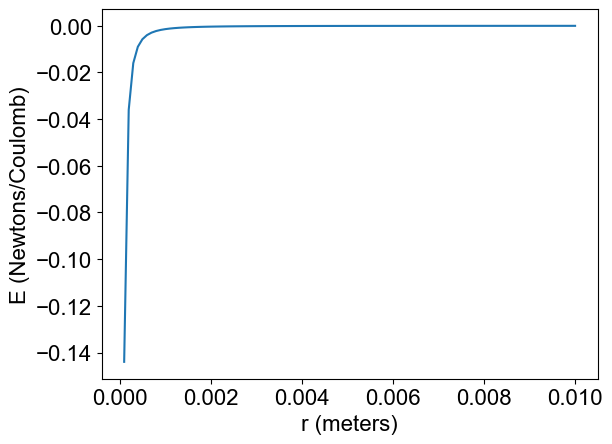

In [8]:
k= 1/(4*np.pi*constants.epsilon_0)
efield= lambda q, r: k*q/r**2
x_axis = np.linspace(0.0001,0.01, num=100, endpoint = True)

plt.plot(x_axis, Efield(-constants.e, x_axis))
plt.xlabel('r (meters)')
plt.ylabel('E (Newtons/Coulomb)')

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0.5, 1.0, '$c^{\\prime} = c(1-f)$')

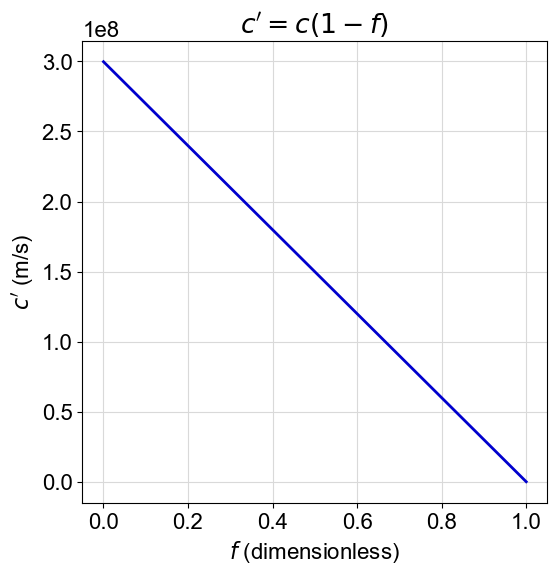

In [9]:
cprime = lambda f: constants.c * (1-f)
f = np.linspace(0,1, num=101, endpoint=True)

plt.figure(figsize=(6,6))
plt.plot(f, cprime(f), color='mediumblue', linewidth=2)
plt.grid(color='0.85')
plt.xlabel(r"$f$ (dimensionless)")
plt.ylabel(r"$c^{\prime}$ (m/s)")
plt.title(r"$c^{\prime} = c(1-f)$")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

C:\Users\63eag\AppData\Local\Temp\ipykernel_9236\895272689.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(constants.mu_0 * cprime**2)


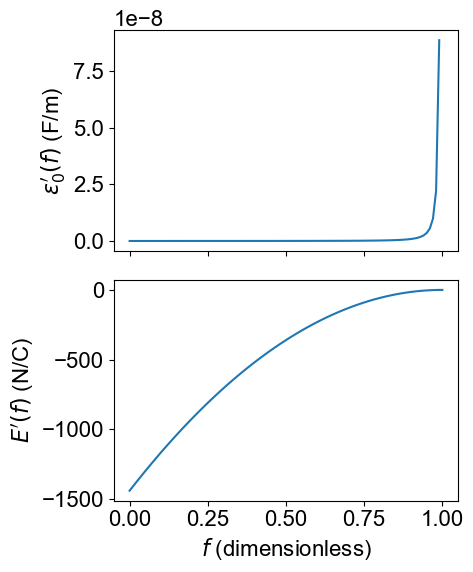

In [10]:
def epsilon0prime(cprime):
    return 1/(constants.mu_0 * cprime**2)

eps0prime = epsilon0prime(cprime(f))
micron = 1e-6
efieldprime = -constants.e /(4*np.pi*eps0prime*micron**2)
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(5,6))

axis1.plot(f, eps0prime)
axis1.set_ylabel(r"$\epsilon_0^{\prime}(f)$ (F/m)")
axis2.plot(f, efieldprime)
axis2.set_ylabel(r"$E^{\prime}(f)$ (N/C)")
axis2.set_xlabel(r"$f$ (dimensionless)")

fig.tight_layout()

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

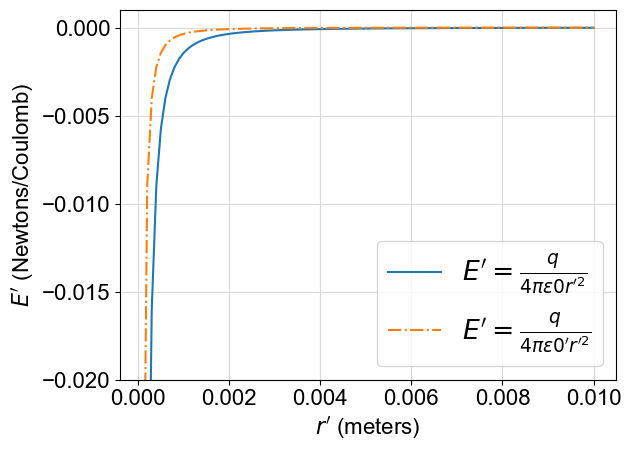

In [11]:
eps0f05 = epsilon0prime(cprime(0.5))
Ef05 = -constants.e / (4*np.pi * eps0f05*x_axis**2)

plt.plot(x_axis, efield(-constants.e, x_axis),
        label=r"$E^{\prime} = \frac{q}{4 \pi \epsilon0 r^{\prime 2}}$")
plt.plot(x_axis, Ef05, linestyle = '-.',
        label=r"$E^{\prime} = \frac{q}{4 \pi \epsilon0^{\prime} r^{\prime 2}}$")
plt.xlabel(r"$r^{\prime}$ (meters)")
plt.ylabel(r"$E^{\prime}$ (Newtons/Coulomb)")
plt.ylim([-0.02, 0.001])
plt.legend(loc='best', fontsize='large')
plt.grid(color='0.85')

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

C:\Users\63eag\AppData\Local\Temp\ipykernel_9236\3122477565.py:1: RuntimeWarning: divide by zero encountered in divide
  mu0prime = 1 / (constants.epsilon_0 * cprime(f)**2)


Text(0.5, 1.0, 'Semilog-y plot: axis is uniform in $\\log_{10}(\\mu0^{\\prime})$')

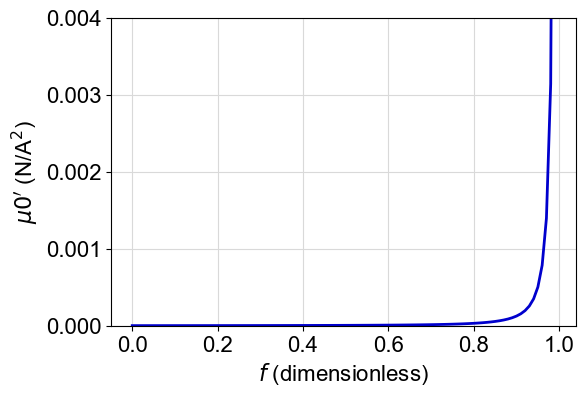

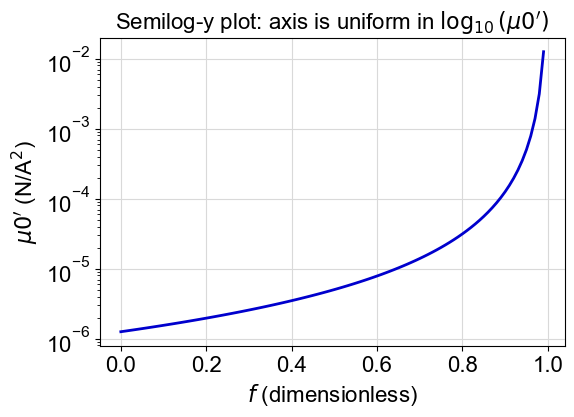

In [13]:
mu0prime = 1 / (constants.epsilon_0 * cprime(f)**2)
plt.figure(figsize=(6,4))
plt.plot(f, mu0prime, color='mediumblue', linewidth=2)
plt.grid(color='0.85')
plt.xlabel(r"$f$ (dimensionless)")
plt.ylabel(r"$\mu0^{\prime}$ (N/A$^2$)")
plt.ylim([0,0.004])

plt.figure(figsize=(6,4))
plt.semilogy(f,mu0prime, color='mediumblue', linewidth=2)
plt.grid(color='0.85')
plt.xlabel(r"$f$ (dimensionless)")
plt.ylabel(r"$\mu0^{\prime}$ (N/A$^2$)")
plt.title(r"Semilog-y plot: axis is uniform in $\log_{10}(\mu0^{\prime})$", fontsize='medium')


<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

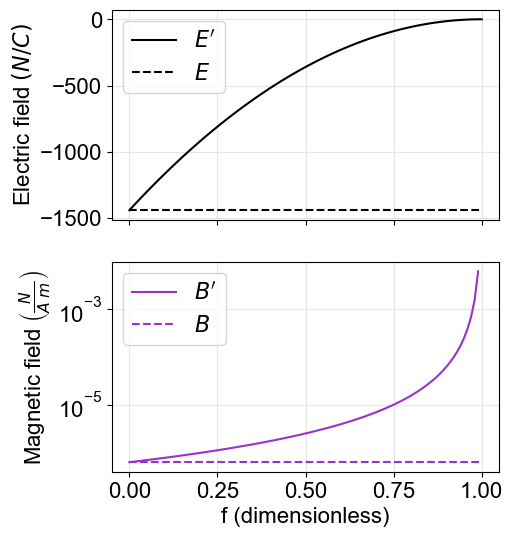

In [15]:
efieldcorrect = -constants.e / (4* np.pi* constants.epsilon_0 * micron**2)
bfieldcorrect = constants.mu_0/2
bfieldprime = mu0prime/2

fig, (axis1,axis2) = plt.subplots(2,1, sharex=True, figsize=(5,6))
axis1.plot(f, efieldprime, label=r"$E^{\prime}$", color='k')
axis1.plot(f, efieldcorrect*np.ones(len(f)), label=r"$E$", color='k', ls='--')
axis1.set_ylabel(r"Electric field $(N/C)$")
axis1.legend(loc='upper left')
axis1.grid(color='0.9')

axis2.semilogy(f, bfieldprime, label=r"$B^{\prime}$", color='darkorchid')
axis2.semilogy(f, bfieldcorrect*np.ones(len(f)), label=r"$B$", color='darkorchid', ls='--')
axis2.set_ylabel(r"Magnetic field $\left( \frac{N}{A \; m} \right)$")
axis2.set_xlabel('f (dimensionless)')
axis2.legend(loc='upper left')
axis2.grid(color='0.9')

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.